In [82]:
import pandas as pd
import numpy
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6
import matplotlib.pyplot as plt
import time
import statsmodels
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import scipy
from sklearn import preprocessing

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [34]:
#filedata= 'C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv'
#filedata= 'C:/Users/C00310965/Desktop/caloba/DFSQS68lagosul_cell_2017.csv'
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
#dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
#data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv',sep=',', parse_dates=['date'],index_col='date',date_parser=dateparse)
#data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv',sep=',', parse_dates=['date'],date_parser=dateparse)
#dataframe = pd.read_csv(filedata, engine='python', sep=';')

In [ ]:
###testes

# Import data

In [83]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
#dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M:%S ')
data = pd.read_csv('C:/Users/C00310965/Desktop/caloba/DFSQS68lagosul_cell_2017.csv',sep=';', parse_dates=['datetime'],index_col='datetime')
print data.head()
print '\n Data Types:'
print data.dtypes

                    region  uf    enodeb  locellid       node  \
datetime                                                        
2016-11-16 01:00:00     CO  DF  EDFSQS01         0  EDFSQS01A   
2016-11-16 02:00:00     CO  DF  EDFSQS01         0  EDFSQS01A   
2016-11-16 03:00:00     CO  DF  EDFSQS01         0  EDFSQS01A   
2016-11-16 04:00:00     CO  DF  EDFSQS01         0  EDFSQS01A   
2016-11-16 05:00:00     CO  DF  EDFSQS01         0  EDFSQS01A   

                     cell_downlink_avg_thp  downlink_traffic_volume  \
datetime                                                              
2016-11-16 01:00:00                15656.0               13470300.0   
2016-11-16 02:00:00                14632.0                 441440.0   
2016-11-16 03:00:00                16668.7                1083580.0   
2016-11-16 04:00:00                39567.3                1129220.0   
2016-11-16 05:00:00                12818.7                1455710.0   

                     average_user_volume  
dat

# Correlação Cruzada

In [400]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

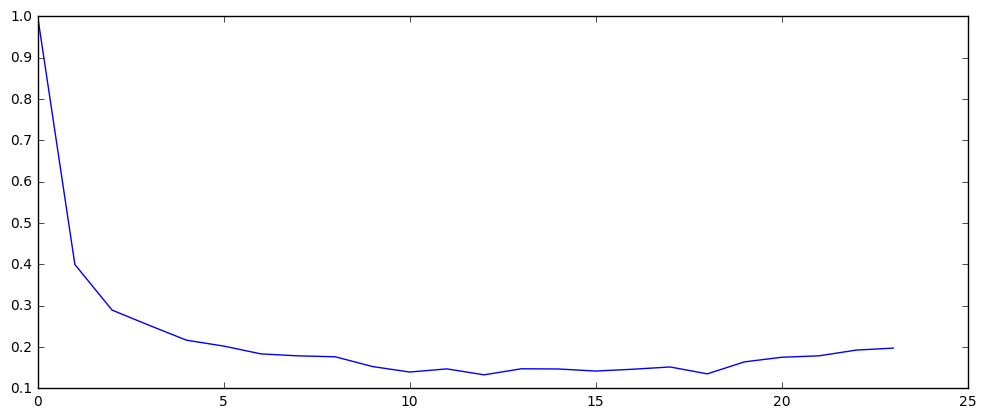

In [404]:
xcov_daily = [crosscorr(data.cell_downlink_avg_thp, data.cell_downlink_avg_thp, lag=i) for i in range(24)]
plt.plot(xcov_daily)

# Drop Null Values from the dataset

In [84]:
data.dropna(inplace=True)

# Separar Dataset

In [ ]:
#train_set = casas[a][casas[a]['date'] < '2017-08-15 00:00:00']
#test_set = casas[a][casas[a]['date'] > '2017-08-15 00:00:00']#.reset_index()

# Teste Homoscedasticity

In [129]:
data.downlink_traffic_volume.shape

(6375L,)

In [86]:
#import scipy
#scipy.stats.bartlett()

# Teste de raízes unitárias 

In [97]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24*7)
    rolstd = pd.rolling_std(timeseries, window=24*7)

    #Plot rolling statistics:
    orig = timeseries.plot(color='blue',label='Original',use_index=False)
    mean = rolmean.plot(color='red', label='Rolling Mean',use_index=False)
    std = rolstd.plot(color='black', label = 'Rolling Std',use_index=False)    
    #orig = plt.plot(timeseries, color='blue',label='Original')
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=168,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=168,center=False).std()


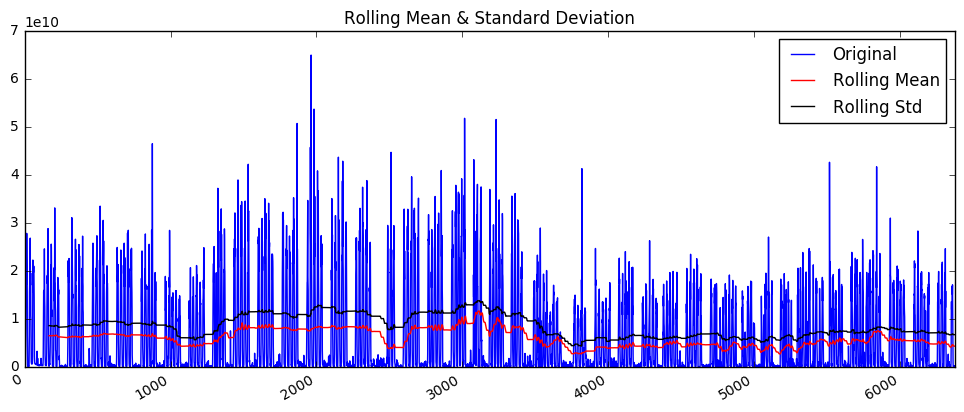

Results of Dickey-Fuller Test:
Test Statistic                -9.833128e+00
p-value                        4.975894e-17
#Lags Used                     3.400000e+01
Number of Observations Used    6.340000e+03
Critical Value (5%)           -2.861996e+00
Critical Value (1%)           -3.431382e+00
Critical Value (10%)          -2.567013e+00
dtype: float64


In [98]:
test_stationarity(data.downlink_traffic_volume)

# Verificar Tendência

In [ ]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
#print(train_set.index.shape, train_set['activeEnergy'].shape)
#linearReg.fit(train_set.index[:, np.newaxis], train_set['activeEnergy'])
#train_set_without_tendency = train_set['activeEnergy'] - linearReg.predict(train_set.index[:, np.newaxis])
#plt.plot(train_set['activeEnergy'])
#plt.plot(train_set_without_tendency)
#plt.show()

# FFT para detectar sazonalidade

In [405]:
ds = data.groupby(pd.TimeGrouper(freq='d')).sum().dropna()
#print(rolmean[~numpy.isnan(rolmean)].shape)
#print(ds.downlink_traffic_volume.values)

In [329]:
import scipy
n_fft = 256
fs = 1
freqsig = scipy.fft(rolmean[~numpy.isnan(rolmean)],n=n_fft)
freqaxis = numpy.arange(0,fs,fs/float(n_fft))

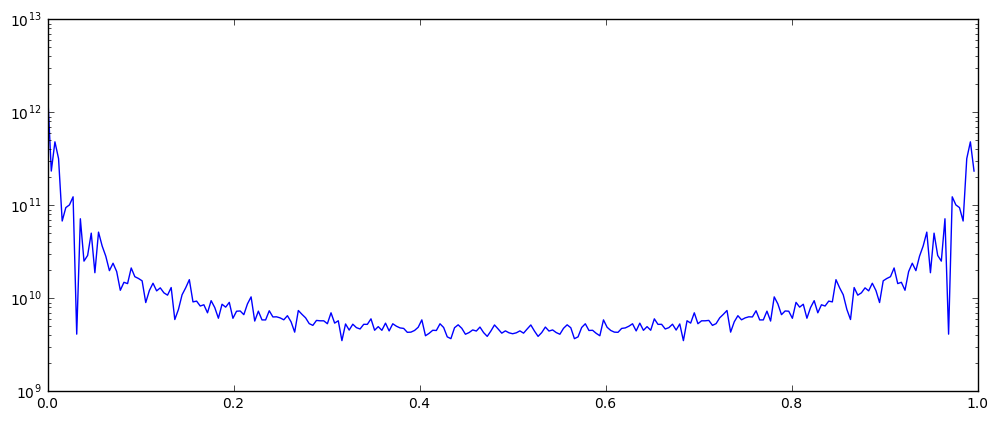

In [369]:
plt.semilogy(freqaxis,numpy.abs(freqsig))

In [398]:
from scipy import signal
f, Pxx_den = signal.welch(ds.downlink_traffic_volume.values, 1, nperseg=2048)

In [356]:
#itemindex = Pxx_den.where(array==max(Pxx_den))
#itemindex = Pxx_den.argmax()
Pxx_den.argsort()[-10:][::-1]

array([43,  1, 41, 44, 84, 42, 40,  2, 83, 45], dtype=int64)

In [372]:
#itemindex = Pxx_den.where(array==max(Pxx_den))
#itemindex = Pxx_den.argmax()
#Pxx_den.argsort()[-3:][::-1]
1/f[2]

147.0

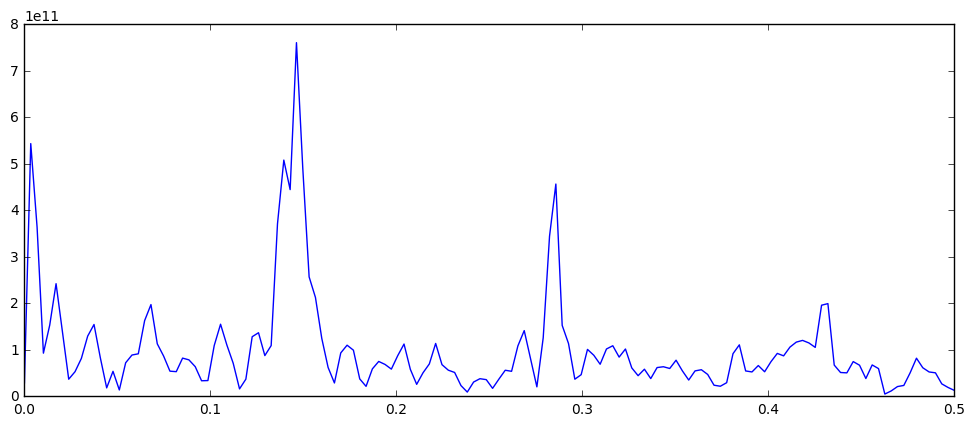

In [371]:
#plt.semilogy(f, numpy.sqrt(Pxx_den))
plt.psd(f, numpy.sqrt(Pxx_den))

In [145]:
#test_stationarity(numpy.log(data.downlink_traffic_volume))

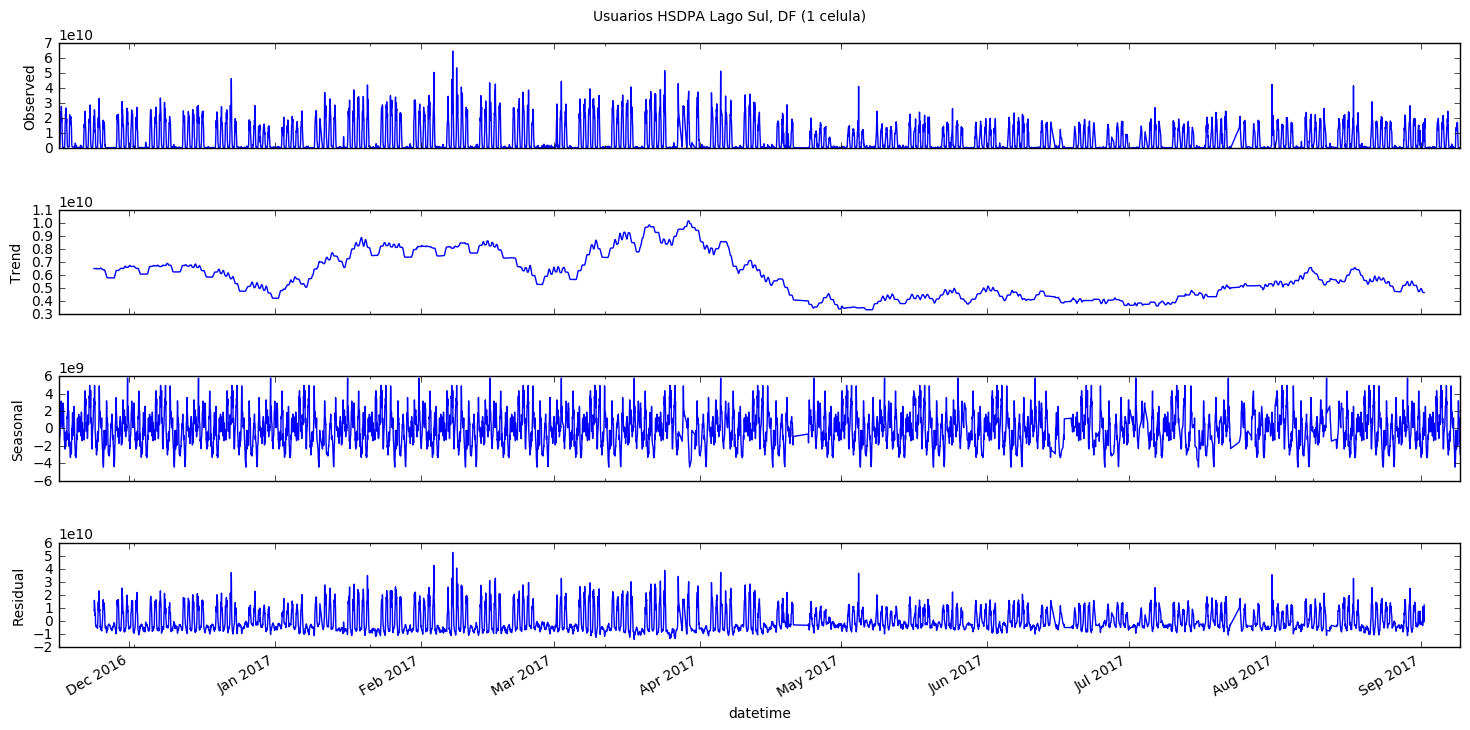

In [88]:
decomposition = sm.tsa.seasonal_decompose(data.downlink_traffic_volume,freq=12*30)


fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
fig.suptitle('Usuarios HSDPA Lago Sul, DF (1 celula)')

In [55]:
#decomposition = sm.tsa.seasonal_decompose(data.cell_downlink_avg_thp,freq=24*30)


#fig = plt.figure()  
#fig = decomposition.plot()  
#fig.set_size_inches(15, 8)
#fig.suptitle('Usuarios HSDPA Lago Sul, DF (1 celula)')

In [101]:
#plt.plot(decomposition.trend)
residuals = decomposition.resid
residual = residuals.dropna(axis=0, how='any')
print(residual)

datetime
2016-11-23 13:00:00    7.616967e+09
2016-11-23 14:00:00    7.844621e+09
2016-11-23 15:00:00    1.576751e+10
2016-11-23 16:00:00    1.330218e+10
2016-11-23 17:00:00    1.082214e+10
2016-11-23 18:00:00    8.192484e+09
2016-11-23 19:00:00    4.108820e+09
2016-11-23 20:00:00    5.898717e+09
2016-11-23 21:00:00   -2.509229e+09
2016-11-23 22:00:00   -3.200811e+09
2016-11-23 23:00:00   -4.114470e+09
2016-11-24 00:00:00   -4.463135e+09
2016-11-24 01:00:00   -3.854417e+09
2016-11-24 02:00:00   -3.434575e+09
2016-11-24 03:00:00   -4.261205e+09
2016-11-24 04:00:00   -3.971874e+09
2016-11-24 05:00:00   -5.130294e+09
2016-11-24 06:00:00   -4.354497e+09
2016-11-24 07:00:00   -5.536688e+09
2016-11-24 08:00:00   -2.201919e+09
2016-11-24 09:00:00    1.945530e+09
2016-11-24 10:00:00    1.077930e+10
2016-11-24 11:00:00    1.467453e+10
2016-11-24 12:00:00    7.759245e+09
2016-11-24 13:00:00    1.394586e+10
2016-11-24 14:00:00    1.252300e+10
2016-11-24 15:00:00    2.303326e+10
2016-11-24 16:00:00

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=168,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=168,center=False).std()


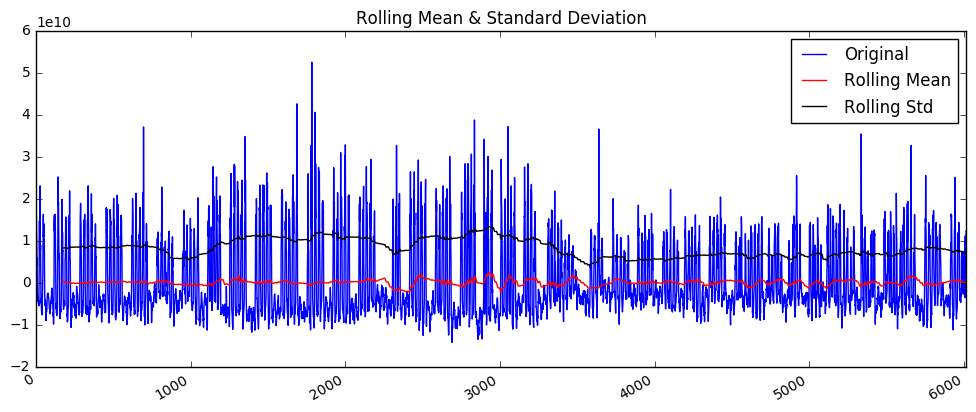

Results of Dickey-Fuller Test:
Test Statistic                -1.069553e+01
p-value                        3.633006e-19
#Lags Used                     3.400000e+01
Number of Observations Used    5.980000e+03
Critical Value (5%)           -2.862023e+00
Critical Value (1%)           -3.431444e+00
Critical Value (10%)          -2.567027e+00
dtype: float64


In [102]:
test_stationarity(residual)

In [ ]:
#preprocessing.scale(X_train)

# Trabalho no dataset

In [ ]:
train_set.set_index('date', inplace = True)
train_set['ResidualSeries'] = s.resid
train_set['SeasonalSeries'] = s.seasonal
train_set['TrendSeries'] = s.trend
train_set.dropna(axis = 0, how = 'any', inplace = True)
train_set.head()

In [ ]:
#test_set.set_index('date', inplace = True)
F = test_set.activeEnergy
sTest = sm.tsa.seasonal_decompose(F, freq = 24)
test_set['ResidualSeries'] = sTest.resid
test_set['SeasonalSeries'] = sTest.seasonal
test_set['TrendSeries'] = sTest.trend
test_set.dropna(axis = 0, how = 'any', inplace = True)
test_set.head()

# MLP

In [179]:
dataset = residual.values
dataset = dataset.astype('float32')
dataset = numpy.expand_dims(dataset, axis=1) 
# split into train and test sets
train_size = int(len(dataset) * 0.674682)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(4058, 1957)


In [192]:
print(trainPredictPlot[6000],testPredictPlot[6000])

(array([ nan], dtype=float32), array([-0.62951601], dtype=float32))


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])

    return np.array(dataX), np.array(dataY)

In [ ]:
look_back=4

In [ ]:
#len(train_set['ResidualSeries'].values)
train_values = train_set['ResidualSeries'].values
train_mean = train_set['ResidualSeries'].mean()
train_std = train_set['ResidualSeries'].std()
train_values -= train_mean
train_values /= train_std


test_values = test_set['ResidualSeries'].values
test_mean = test_set['ResidualSeries'].mean()
test_std = test_set['ResidualSeries'].std()
test_values -= test_mean
test_values /= test_std

x, y = create_dataset(train_values, look_back = look_back)
testx, testy = create_dataset(test_values, look_back = look_back)
print(y[:10], '\n',train_values[:30])
print(x.shape, y.shape)

(4058, 1957)
Epoch 1/200
0s - loss: 0.0370 - mean_squared_error: 0.0370 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 270.9360
Epoch 2/200
0s - loss: 0.0196 - mean_squared_error: 0.0196 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 372.1611
Epoch 3/200
0s - loss: 0.0167 - mean_squared_error: 0.0167 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 466.4289
Epoch 4/200
0s - loss: 0.0156 - mean_squared_error: 0.0156 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 423.7494
Epoch 5/200
0s - loss: 0.0150 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 412.1576
Epoch 6/200
0s - loss: 0.0147 - mean_squared_error: 0.0147 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 392.4466
Epoch 7/200
0s - loss: 0.0145 - mean_squared_error: 0.0145 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 410.8100
Epoch 8/200
0s - loss: 0.0144 - mean_squared_error: 0.0144 - me

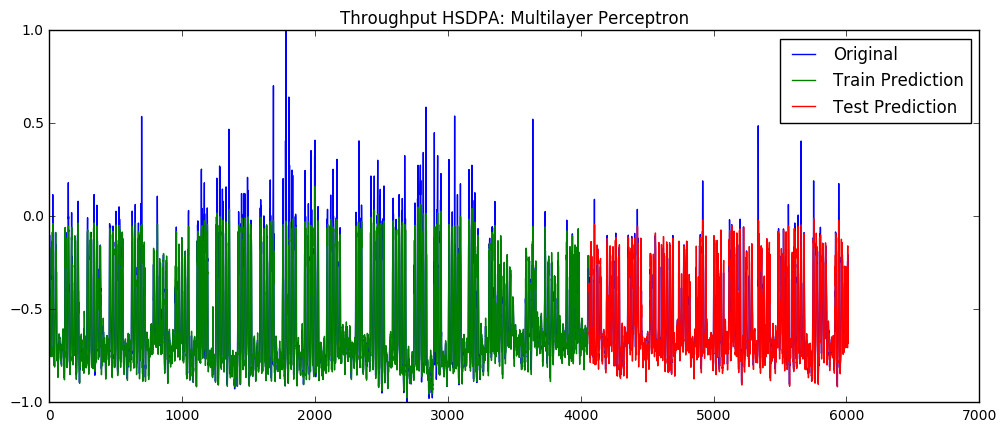

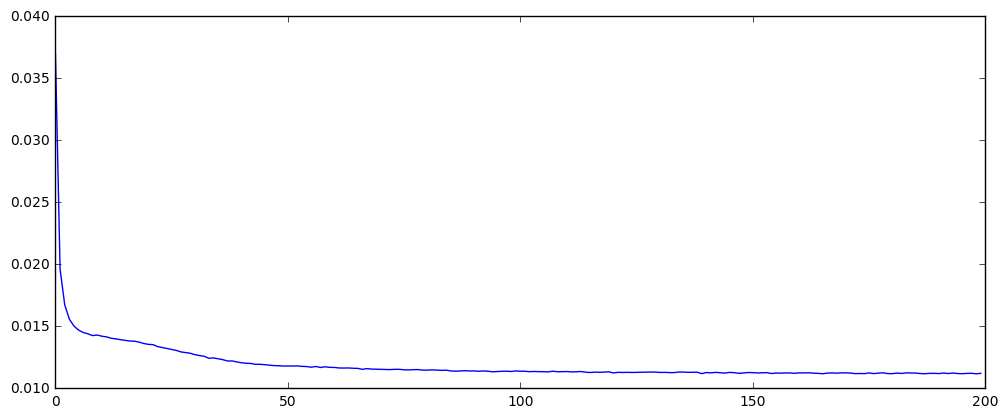

In [193]:
dataset = residual.values
dataset = dataset.astype('float32')
dataset = numpy.expand_dims(dataset, axis=1)  

#scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.674682)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

start_time = time.time()

# Function to create model, required for KerasClassifier
def create_model():
    # create model Multilayer Perceptron model
    model = Sequential()
    model.add(Dense(4, input_dim=look_back, activation='tanh'))
    model.add(Dense(1,activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='SGD',metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])
    return model

history = model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)
# Estimate model performance

testScore = model.evaluate(testX, testY, verbose=0)
print(testScore)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

####time taken
timestamp = (time.time() - start_time)
print("time: "+str(timestamp))
# plot baseline and predictions
plt.plot(dataset,label='Original')
plt.plot(trainPredictPlot,label='Train Prediction')
plt.plot(testPredictPlot,label = 'Test Prediction')
plt.legend(loc='best')
plt.title('Throughput HSDPA: Multilayer Perceptron')
plt.show()
plt.plot(history.history['loss'])
plt.show()

In [209]:
residual.shape

(6015L,)

In [ ]:
predictedTest = model.predict(testx)

ploting = predictedTest*test_std + test_mean 
ploting += test_set['SeasonalSeries'].values[23:-2, np.newaxis] +test_set['TrendSeries'].values[23:-2, np.newaxis]
print(test_std, test_mean)
print(test_set['SeasonalSeries'].values.shape, test_set['TrendSeries'].values.shape)
print(predictedTest.shape, ploting.shape)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(mean_absolute_percentage_error(test_set['activeEnergy'][5:-2].values, ploting))

In [ ]:
plt.figure(figsize = (12,6))
plt.title('Predicted residual series')
plt.plot(test_set['ResidualSeries'][23:-2].values, 'g')
plt.plot(predictedTest, 'r')
plt.legend(['Original', 'Predicted'])
plt.show()

plt.figure(figsize = (12,6))
plt.title('Predicted activeEnergy')
plt.plot(test_set['activeEnergy'][23:-2].values, 'g')
plt.plot(ploting, 'r')
plt.legend(['Original', 'Predicted'])
#plt.text('MSE %.3f'%)
plt.show()

In [218]:
from sklearn.model_selection import KFold
from sklearn import preprocessing

n_folds = int(10)
#n_samples =  int(0.1*data_target.shape[0])
n_inits = 5
norm = 'mapstd'
dados = residual
kf = KFold(n_splits=n_folds)
CVO = list(kf.split(dados))
#print(CVO)

for ifold in range(n_folds):
    train_id, test_id = CVO[ifold]
    print(train_id, test_id)

(array([ 602,  603,  604, ..., 6012, 6013, 6014], dtype=int64), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,


In [214]:
from sklearn.model_selection import KFold
from sklearn import preprocessing

n_folds = int(10)
#n_samples =  int(0.1*data_target.shape[0])
n_inits = 5
norm = 'mapstd'
dados = dataset
kf = KFold(n_splits=n_folds,shuffle=True)
CVO = list(kf.split(dados))

# Train information 
#n_folds = 2
#n_inits = 1
#norm = 'mapstd'

train_info = {}
train_info['n_folds'] = n_folds
train_info['n_inits'] = n_inits
train_info['norm'] = norm

trn_desc = {}
estimator = {}

# Isto deve estar dentro do primeiro 'for'. dessa maneira meu conjuto de treino e validação são os mesmo em todos os folds.

MOP_list = []                           
for ifold in range(n_folds):
    train_id, test_id = CVO[ifold]
    
    
    # normalize data based in train set
    if train_info['norm'] == 'mapstd':
        scaler = preprocessing.StandardScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapstd_rob':
        scaler = preprocessing.RobustScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapminmax':
        scaler = preprocessing.MinMaxScaler().fit(data_inputs[train_id,:])
        
    norm_all_data = scaler.transform(data_inputs)
# Normalize the outputs
    [freq, target_values] = np.histogram(data_target[train_id,:],
             bins=np.linspace(data_target[train_id,:].min(),data_target[train_id,:].max(),50))

    MOP = target_values[np.argmax(freq)]
    MOP_list.append(MOP)
    print('Fold',ifold, 'MOP=', MOP)

NameError: name 'data_inputs' is not defined

In [393]:
#from IPython.display import SVG
#import pydot
#from keras.utils.visualize_util import model_to_dot

#import keras.utils.visualize_util 
#dir(keras.utils.visualize_util)
#plot_model(model, to_file='model.png')

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

AttributeError: 'module' object has no attribute 'find_graphviz'

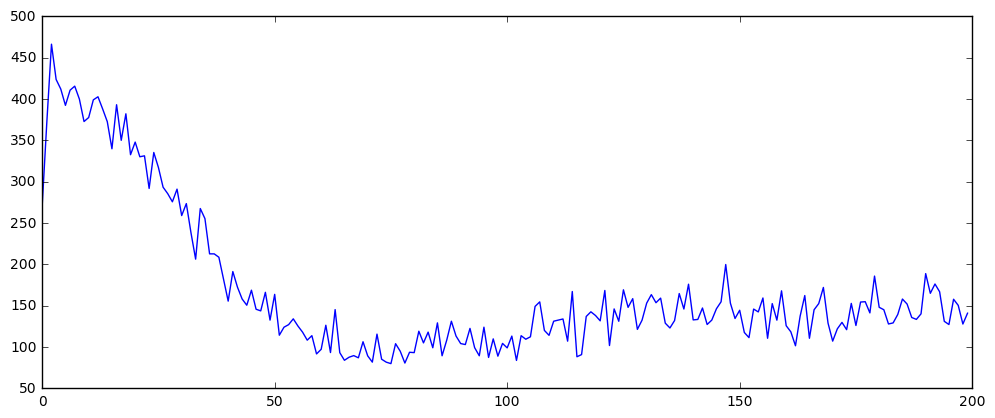

In [194]:
plt.plot(history.history['mean_absolute_percentage_error'])

# Função de Auto-correlação

In [107]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [119]:
lag_acf = acf(residual, nlags=24,fft =True)
lag_pacf = pacf(residual, nlags=24, alpha=.05,method='ols')

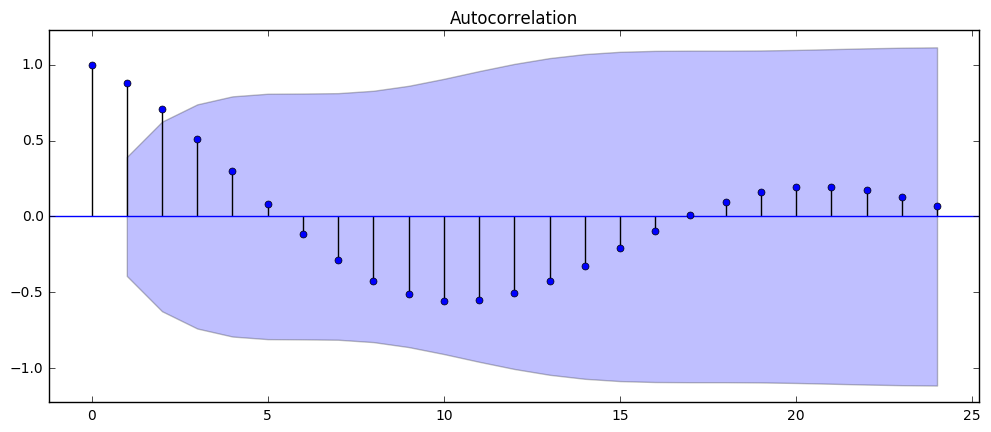

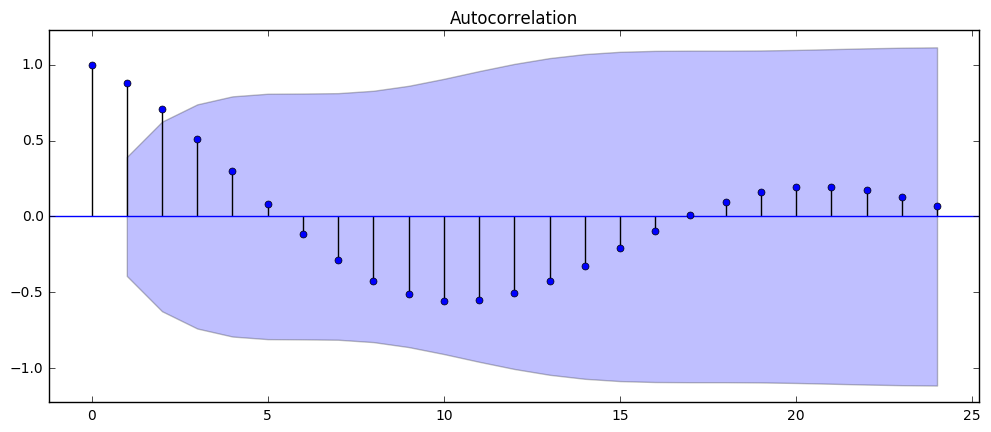

In [121]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(lag_acf,fft=True)
#label('Autocorrelation Function')

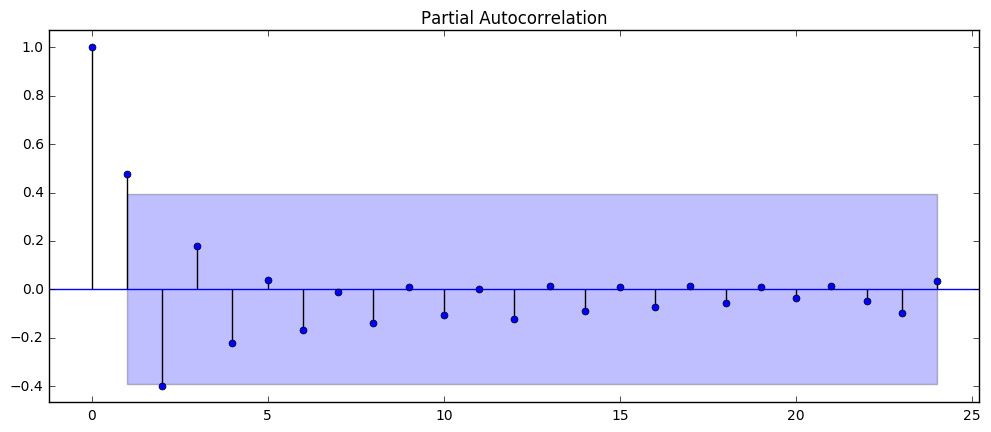

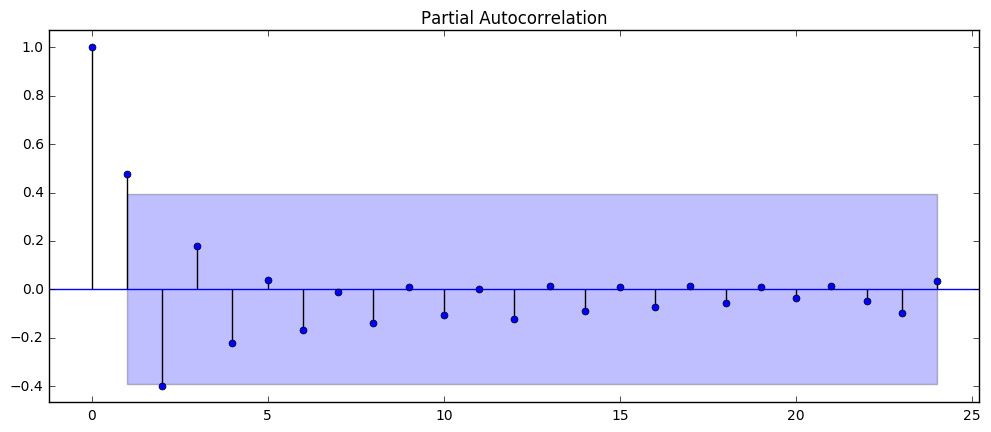

In [112]:
tsaplots.plot_pacf(lag_pacf)
#label('Partial Autocorrelation Function')

# ARIMA 

In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.674682)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [137]:
from statsmodels.tsa.arima_model import ARIMA


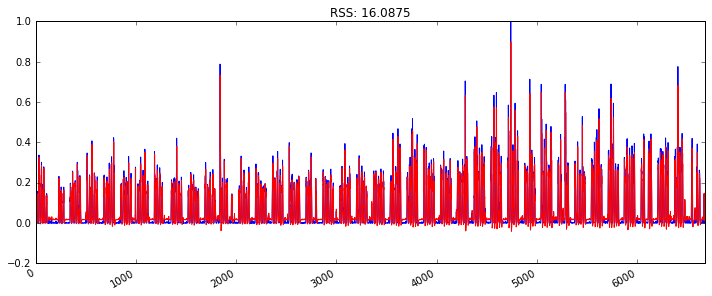

In [138]:
model = ARIMA(ds_log, order=(4, 0, 1))
results_ARIMA = model.fit(disp=-1)  
ds_log_diff.plot(use_index=False)
results_ARIMA.fittedvalues.plot(color='red',use_index=False)
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ds_log_diff)**2))
#results_ARIMA.plot_predict(468, 600, dynamic=True, plot_insample=False).plot

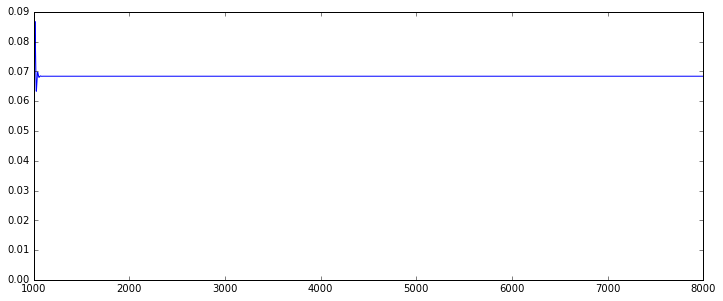

In [143]:
#results_ARIMA.predict(start='2016-09-22 00:00:00', end='2016-09-22 23:00:00', exog=None, dynamic=False).plot()
results_ARIMA.predict(start=1000, end=8000, exog=None, dynamic=True).plot()
#forecast = results_ARIMA.forecast(steps=300, exog=None, alpha=0.05)[0].tolist()
#results_ARIMA.forecast(steps=48, exog=None, alpha=0.05)[0].tolist()
#plt.plot(forecast)

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

date
2016-09-12 00:30:00    0.000360
2016-09-12 01:00:00   -0.019058
2016-09-12 01:30:00   -0.014906
2016-09-12 02:00:00   -0.014536
2016-09-12 02:30:00   -0.024206
dtype: float64


In [153]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

date
2016-09-12 00:30:00    0.001045
2016-09-12 01:00:00   -0.018820
2016-09-12 01:30:00   -0.014230
2016-09-12 02:00:00   -0.013852
2016-09-12 02:30:00   -0.021658
dtype: float64


In [175]:
predictions_ARIMA_log = pd.Series(ds_log.ix[0], index=ds_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2016-09-12 00:00:00    0.307941
2016-09-12 00:30:00    0.307941
2016-09-12 01:00:00    0.307941
2016-09-12 01:30:00    0.307941
2016-09-12 02:00:00    0.307941
dtype: float64

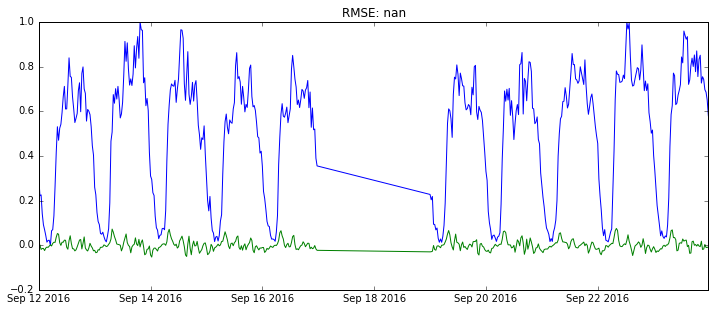

In [41]:
#predictions_ARIMA = predictions_ARIMA_log#np.exp(predictions_ARIMA_log)
predictions_ARIMA = predictions_ARIMA_diff#np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [179]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/test_lago_sul_20160907_20160930.csv',sep=';', parse_dates=['date'],index_col='date',date_parser=dateparse)
print data.head()
print '\n Data Types:'
print data.dtypes

                                     node  data_hsdpa  hsdpa_users  thp_hsdpa  \
date                                                                            
2016-09-26 00:00:00  DF-BRASILIA-LAGO_SUL        5.54       166.07    1231.98   
2016-09-26 00:30:00  DF-BRASILIA-LAGO_SUL        5.70       146.20    1203.61   
2016-09-26 01:00:00  DF-BRASILIA-LAGO_SUL        4.63       115.87    1040.41   
2016-09-26 01:30:00  DF-BRASILIA-LAGO_SUL        3.72        97.22     888.19   
2016-09-26 02:00:00  DF-BRASILIA-LAGO_SUL        3.24        77.47    1053.04   

                     data_hsdpa_norm  
date                                  
2016-09-26 00:00:00        -0.153330  
2016-09-26 00:30:00        -0.143001  
2016-09-26 01:00:00        -0.212077  
2016-09-26 01:30:00        -0.270825  
2016-09-26 02:00:00        -0.301813  

 Data Types:
node                object
data_hsdpa         float64
hsdpa_users        float64
thp_hsdpa          float64
data_hsdpa_norm    float64
dtype: obj

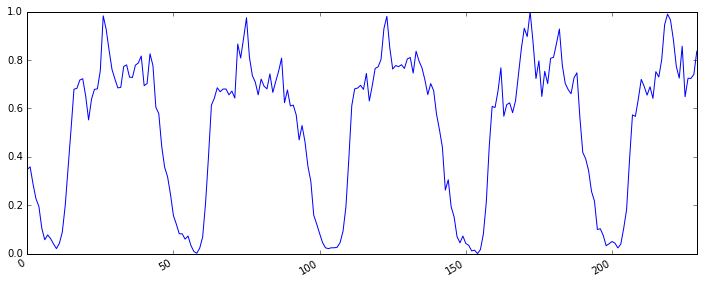

In [181]:
ts = data['data_hsdpa']
ts = (ts - ts.min()) / (ts.max() - ts.min())
ts.plot(use_index=False)

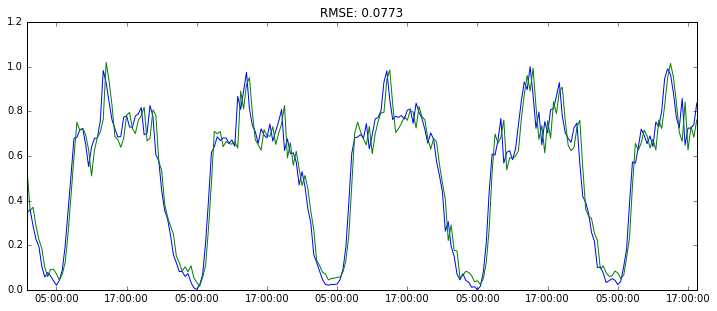

In [183]:
model = ARIMA(ts, order=(1, 0, 5))  
results_ARIMA = model.fit(disp=-1)  

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA = predictions_ARIMA_diff#np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))